In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
from tabulate import tabulate

# Load the datasets
RT_df = pd.read_csv('Clean_RT_data.csv')
imdb_df = pd.read_csv('Clean_iMDb_data.csv')
full_df = pd.read_csv('Clean_movie_data.csv')

#Create table to summarize ratings
table = full_df[['RT Critics Score', 'RT Audience Score', 'iMDb Critics Score', 'iMDb Metascore']].describe().round(2)
table = table.drop(index = ['25%', '50%', '75%'])

#Print table
print(tabulate(table, headers='keys', tablefmt='pretty'))


+-------+------------------+-------------------+--------------------+----------------+
|       | RT Critics Score | RT Audience Score | iMDb Critics Score | iMDb Metascore |
+-------+------------------+-------------------+--------------------+----------------+
| count |      742.0       |       742.0       |       738.0        |     683.0      |
| mean  |      62.15       |       60.6        |       64.23        |     57.86      |
|  std  |      28.03       |       20.0        |        8.67        |     17.06      |
|  min  |       0.0        |        5.0        |        31.0        |      1.0       |
|  max  |      100.0       |       100.0       |        85.0        |      99.0      |
+-------+------------------+-------------------+--------------------+----------------+


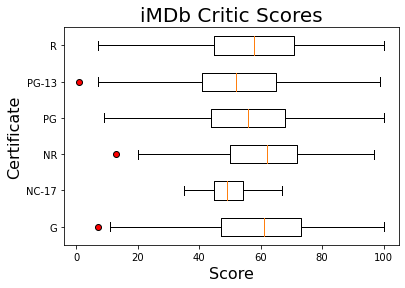

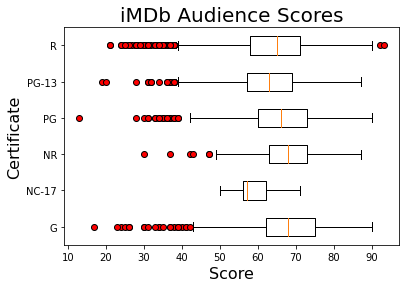

In [5]:

# Remove rows where either 'iMDb Metascore' or 'Certificate' is NaN
imdb_df_clean = imdb_df.dropna(subset=['iMDb Metascore', 'Certificate'])

# Group the data by 'Certificate' and get a list of metascores for each certificate
group = imdb_df_clean.groupby('Certificate')['iMDb Metascore'].apply(list)

# Create the boxplot
plt.figure(1)  

# Create the boxplot with horizontal orientation (vert=False)
plt.boxplot(group, vert=False, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})

# Set plot title and labels
plt.title('iMDb Critic Scores', fontsize=20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Certificate', fontsize=16)

# Set y-axis ticks to be the labels of the certificates
plt.yticks(range(1, len(group) + 1), group.index)

# Show the plot
plt.show()


#Plot another boxplot of audience scores

# Remove rows where either 'iMDb Metascore' or 'Certificate' is NaN
imdb_df_clean = imdb_df.dropna(subset=['iMDb Critics Score', 'Certificate'])

# Group the data by 'Certificate' and get a list of metascores for each certificate
group = imdb_df_clean.groupby('Certificate')['iMDb Critics Score'].apply(list)

# Create the boxplot
plt.figure(2)  

# Create the boxplot with horizontal orientation (vert=False)
plt.boxplot(group, vert=False, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})

# Set plot title and labels
plt.title('iMDb Audience Scores', fontsize=20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Certificate', fontsize=16)

# Set y-axis ticks to be the labels of the certificates
plt.yticks(range(1, len(group) + 1), group.index)

# Show the plot
plt.show()


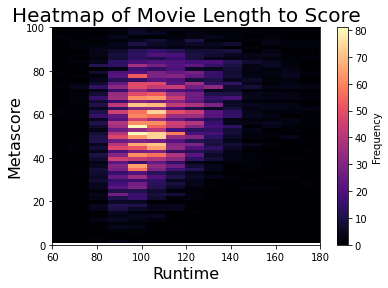

In [6]:
#Create heat map

# Drop rows where either 'Runtime' or 'Metascore' is NaN
imdb_df_clean = imdb_df.dropna(subset=['Runtime', 'iMDb Metascore'])

# Now plot the heatmap using hist2d
plt.figure(3)  
plt.hist2d(imdb_df_clean['Runtime'], imdb_df_clean['iMDb Metascore'], bins=60, cmap='magma')

# Add titles and labels
plt.title('Heatmap of Movie Length to Score', fontsize=20)
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Metascore', fontsize=16)
plt.colorbar(label='Frequency')
plt.xlim(60, 180)
plt.ylim(0, 100)

# Show the plot
plt.show()


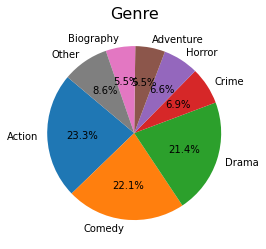

In [7]:
# Assuming imdb_df is your DataFrame containing 'Genre' column
counts = imdb_df['Genre'].value_counts()

# Identify genres with counts less than 500 and replace them with 'Other'
other_genres = counts[counts < 500]
counts.loc['Other'] = other_genres.sum()  
counts = counts[counts >= 500]  

# Now plot the pie chart
counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.ylabel('') 
plt.title('Genre', fontsize=16)
plt.show()


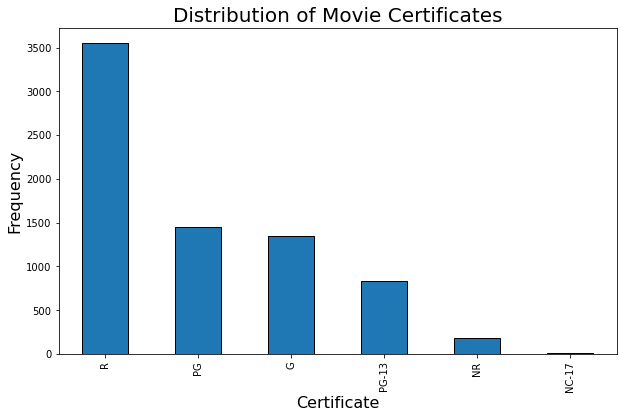

In [8]:
#Count the occurances of each certificate
certificate_counts = imdb_df['Certificate'].value_counts()

# Create a bar plot for the frequency of certificates
plt.figure(2, figsize=(10, 6))

# Plot the bar chart
certificate_counts.plot(kind='bar', edgecolor='black')

# Set title and labels
plt.title('Distribution of Movie Certificates', fontsize=20)
plt.xlabel('Certificate', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()


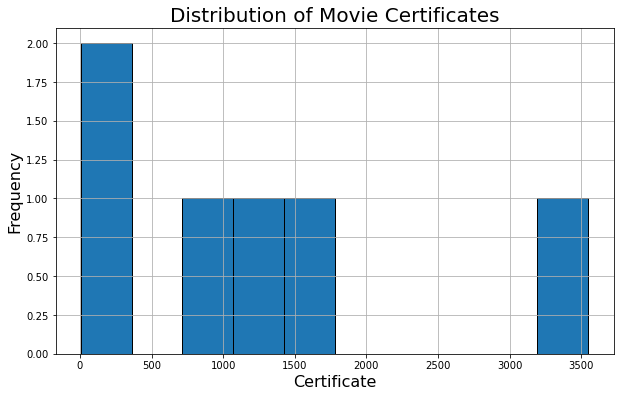

In [9]:
#Create histogram
# Create a bar plot for the frequency of certificates
plt.figure(2, figsize=(10, 6))

# Plot the bar chart
certificate_counts.plot(kind='hist', edgecolor='black')

# Set title and labels
plt.title('Distribution of Movie Certificates', fontsize=20)
plt.xlabel('Certificate', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Add gridlines
plt.grid(True, which='both')

# Display the plot
plt.show()


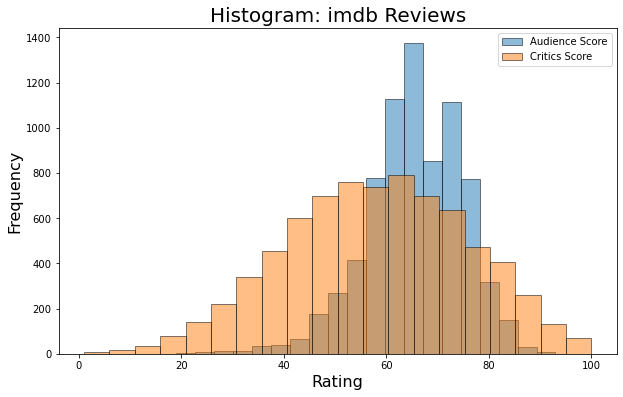

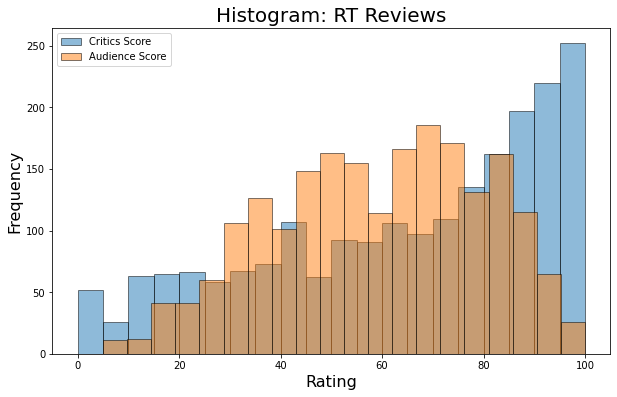

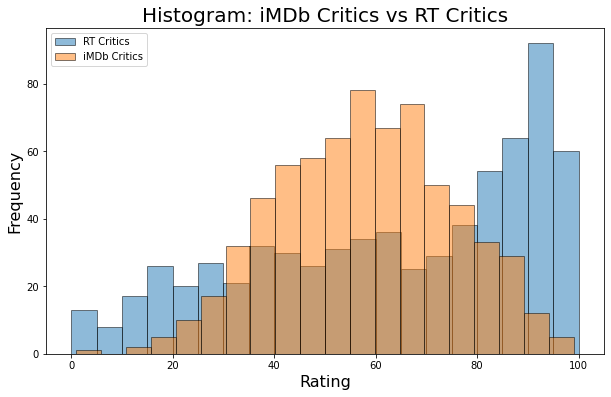

In [10]:
#Create histogram of imdb reviews
# Clean the data by removing NaN values for these two columns
imdb_df_clean = imdb_df.dropna(subset=['iMDb Critics Score', 'iMDb Metascore'])

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram for 'iMDb Critics Score'
plt.hist(imdb_df_clean['iMDb Critics Score'], bins=20, alpha=0.5, label='Audience Score', edgecolor='black')

# Plot histogram for 'iMDb Metascore'
plt.hist(imdb_df_clean['iMDb Metascore'], bins=20, alpha=0.5, label='Critics Score', edgecolor='black')

# Set title and labels
plt.title('Histogram: imdb Reviews', fontsize=20)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()


#Create histogram of RT reviews
# Clean the data by removing NaN values for these two columns
imdb_df_clean = RT_df.dropna(subset=['RT Critics Score', 'RT Audience Score'])

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram for 'iMDb Critics Score'
plt.hist(imdb_df_clean['RT Critics Score'], bins=20, alpha=0.5, label='Critics Score', edgecolor='black')

# Plot histogram for 'iMDb Metascore'
plt.hist(imdb_df_clean['RT Audience Score'], bins=20, alpha=0.5, label='Audience Score', edgecolor='black')

# Set title and labels
plt.title('Histogram: RT Reviews', fontsize=20)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()


#Create histogram of imdb critics vs rotten tomatoes critics
imdb_df_clean = full_df.dropna(subset=['RT Critics Score', 'iMDb Metascore'])

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram for 'iMDb Critics Score'
plt.hist(imdb_df_clean['RT Critics Score'], bins=20, alpha=0.5, label='RT Critics', edgecolor='black')

# Plot histogram for 'iMDb Metascore'
plt.hist(imdb_df_clean['iMDb Metascore'], bins=20, alpha=0.5, label='iMDb Critics', edgecolor='black')

# Set title and labels
plt.title('Histogram: iMDb Critics vs RT Critics', fontsize=20)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()

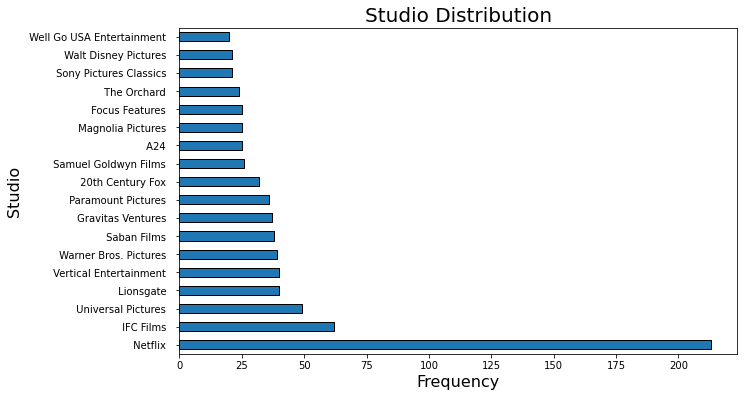

In [11]:
#We will create a horizontal bar graph
# Count the occurrences of each studio
Studio_counts = RT_df['Studio'].value_counts()

# Identify studios with counts less than 50 and replace them with 'Other'
Studio_counts = Studio_counts[Studio_counts >= 20]  

# Create a bar plot for the frequency of certificates
plt.figure(2, figsize=(10, 6))

# Plot the bar chart
Studio_counts.plot(kind='barh', edgecolor='black')

# Set title and labels
plt.title('Studio Distribution', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Studio', fontsize=16)

# Show the plot
plt.show()


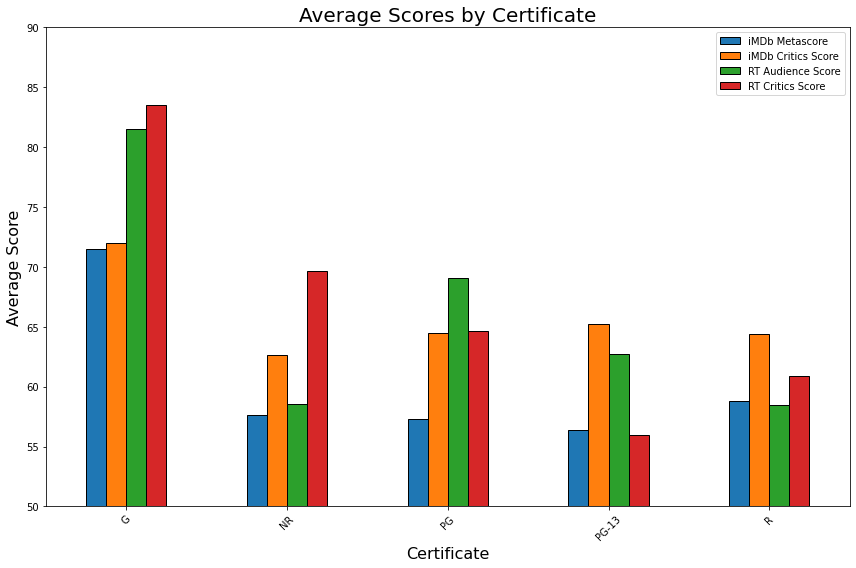

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming imdb_df is your DataFrame and contains the columns:
# 'Certificate', 'iMDb Metascore', 'iMDb Critics Score', 'RT Audience Score', 'RT Critics Score'

# Group by 'Certificate' and calculate the mean for each of the scores
avg_scores_by_cert = full_df.groupby('Certificate_x')[['iMDb Metascore', 'iMDb Critics Score', 'RT Audience Score', 'RT Critics Score']].mean()

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for each certificate and its corresponding scores
avg_scores_by_cert.plot(kind='bar', edgecolor='black', ax=plt.gca())

# Set the title and axis labels
plt.title('Average Scores by Certificate', fontsize=20)
plt.xlabel('Certificate', fontsize=16)
plt.ylabel('Average Score', fontsize=16)
plt.ylim(50, 90)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()
